In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical
import time
import matplotlib.pyplot as plt

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 5, adversaryProbs=adversaryProbs)

0
tensor([0.0201, 0.0195, 0.0179, 0.0181, 0.0174, 0.0200, 0.0184, 0.0208, 0.0168,
        0.0237, 0.0178, 0.0225, 0.0195, 0.0183, 0.0165, 0.0205, 0.0200, 0.0187,
        0.0164, 0.0185, 0.0202, 0.0239, 0.0204, 0.0145, 0.0209, 0.0177, 0.0214,
        0.0256, 0.0188, 0.0209, 0.0198, 0.0173, 0.0205, 0.0278, 0.0182, 0.0201,
        0.0193, 0.0203, 0.0181, 0.0209, 0.0216, 0.0189, 0.0209, 0.0241, 0.0211,
        0.0209, 0.0187, 0.0212, 0.0243, 0.0200], grad_fn=<SoftmaxBackward0>)
tensor([0.0187, 0.0197, 0.0216, 0.0201, 0.0183, 0.0236, 0.0178, 0.0223, 0.0199,
        0.0188, 0.0172, 0.0238, 0.0186, 0.0193, 0.0246, 0.0250, 0.0214, 0.0213,
        0.0198, 0.0179, 0.0195, 0.0232, 0.0199, 0.0187, 0.0180, 0.0199, 0.0214,
        0.0251, 0.0169, 0.0190, 0.0179, 0.0168, 0.0197, 0.0255, 0.0170, 0.0215,
        0.0212, 0.0186, 0.0163, 0.0186, 0.0164, 0.0195, 0.0184, 0.0199, 0.0210,
        0.0178, 0.0204, 0.0211, 0.0207, 0.0205], grad_fn=<SoftmaxBackward0>)
10
tensor([0.0193, 0.0146, 0.0173, 0.0167, 0

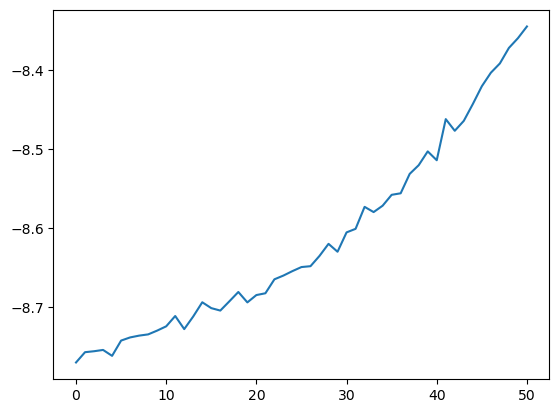

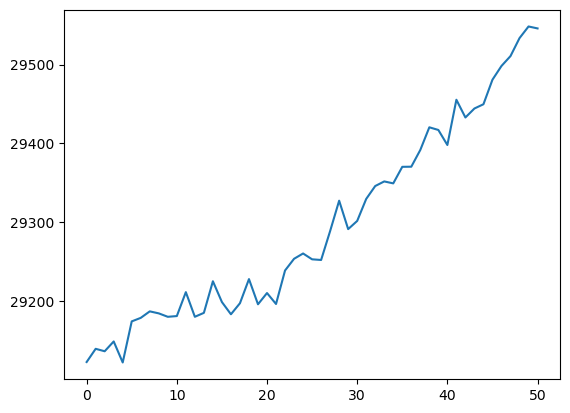

60
tensor([0.0091, 0.0066, 0.0058, 0.0096, 0.0036, 0.0105, 0.0090, 0.0156, 0.0050,
        0.0158, 0.0243, 0.0076, 0.0154, 0.0131, 0.0115, 0.0190, 0.0107, 0.0325,
        0.0226, 0.0072, 0.0236, 0.0321, 0.0468, 0.0162, 0.0160, 0.0166, 0.0504,
        0.0489, 0.0207, 0.0205, 0.0168, 0.0131, 0.0292, 0.0367, 0.0197, 0.0483,
        0.0171, 0.0460, 0.0107, 0.0174, 0.0681, 0.0122, 0.0136, 0.0191, 0.0086,
        0.0072, 0.0067, 0.0091, 0.0287, 0.0252], grad_fn=<SoftmaxBackward0>)
tensor([0.0089, 0.0095, 0.0217, 0.0384, 0.0073, 0.0358, 0.0192, 0.0611, 0.0097,
        0.0148, 0.0261, 0.0136, 0.0229, 0.0228, 0.0382, 0.0657, 0.0276, 0.0650,
        0.0670, 0.0056, 0.0417, 0.0228, 0.0293, 0.0201, 0.0096, 0.0296, 0.0432,
        0.0368, 0.0134, 0.0105, 0.0046, 0.0073, 0.0056, 0.0179, 0.0076, 0.0276,
        0.0093, 0.0130, 0.0036, 0.0055, 0.0195, 0.0047, 0.0031, 0.0087, 0.0043,
        0.0022, 0.0029, 0.0052, 0.0059, 0.0039], grad_fn=<SoftmaxBackward0>)
70
tensor([0.0069, 0.0045, 0.0039, 0.0064, 

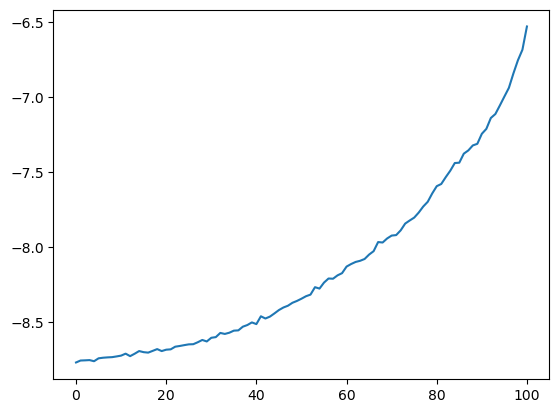

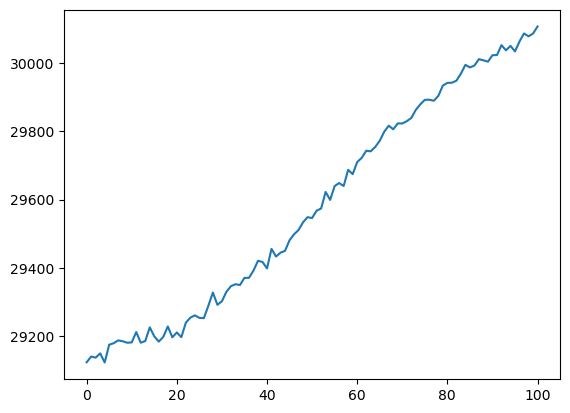

110
tensor([8.7827e-04, 1.1630e-03, 6.7713e-04, 9.5610e-04, 3.1369e-04, 1.0526e-03,
        1.1102e-03, 1.4121e-03, 3.2190e-04, 2.1463e-03, 3.2293e-02, 9.6593e-04,
        1.6214e-03, 5.3604e-03, 2.4551e-03, 1.0447e-02, 1.1263e-03, 5.2508e-03,
        9.1678e-03, 1.0505e-03, 8.5587e-03, 7.0381e-03, 6.3056e-02, 7.5489e-03,
        7.3870e-03, 9.1059e-03, 3.8929e-02, 3.3907e-01, 6.7068e-03, 8.6573e-03,
        5.0354e-03, 6.4972e-03, 5.1077e-02, 8.0616e-02, 1.3483e-02, 4.0085e-02,
        2.9596e-03, 5.6155e-02, 1.9971e-03, 4.7811e-03, 9.4046e-02, 2.4185e-03,
        1.1239e-02, 6.7917e-03, 3.8285e-03, 3.7326e-03, 6.4206e-04, 9.5176e-04,
        1.7462e-02, 2.0370e-02], grad_fn=<SoftmaxBackward0>)
tensor([1.1797e-03, 2.7231e-03, 7.7345e-03, 1.1321e-02, 4.0137e-04, 1.0779e-02,
        7.2081e-03, 8.8766e-03, 6.4008e-04, 2.7640e-03, 2.2410e-01, 1.6376e-03,
        1.8029e-03, 1.0744e-02, 5.1294e-03, 2.7505e-01, 2.6045e-03, 5.1440e-02,
        3.4236e-02, 3.9540e-04, 3.2960e-02, 3.6550e-03,

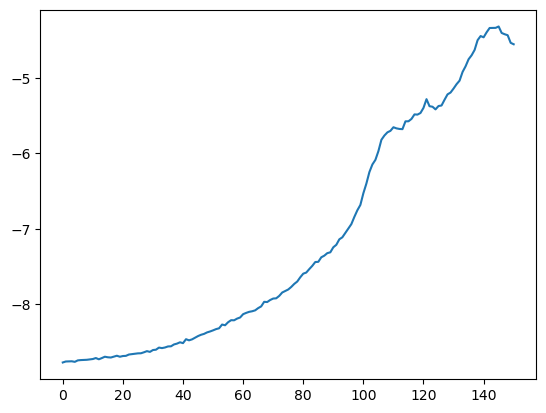

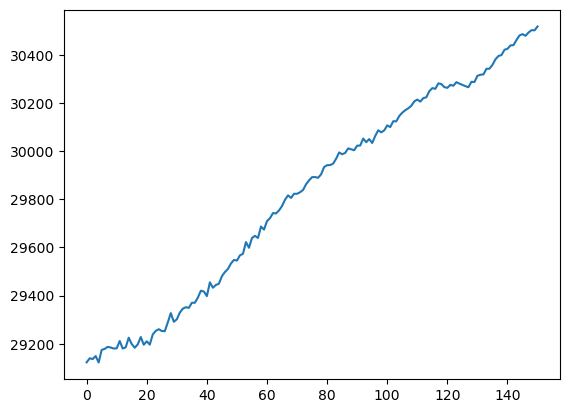

160
tensor([2.6476e-04, 2.6582e-04, 1.7738e-04, 1.0816e-04, 9.2973e-05, 9.0763e-05,
        1.6793e-04, 4.4780e-04, 7.6581e-05, 6.0984e-04, 2.4522e-03, 3.8601e-04,
        7.4368e-04, 6.2635e-03, 8.9818e-04, 1.5932e-03, 2.0036e-04, 1.5053e-03,
        1.7578e-03, 2.8579e-04, 5.3194e-03, 2.6064e-03, 1.0195e-02, 3.6794e-03,
        4.7279e-03, 3.3369e-03, 1.0389e-02, 1.4339e-01, 2.1907e-03, 3.9776e-03,
        5.5299e-03, 2.9132e-03, 5.0487e-02, 1.4815e-01, 2.1025e-03, 1.5455e-02,
        1.1952e-03, 2.9287e-01, 1.2063e-03, 1.9880e-03, 2.0464e-01, 1.3162e-03,
        7.2325e-03, 1.5566e-02, 3.8899e-03, 6.7857e-03, 2.5491e-04, 3.2690e-04,
        2.4746e-02, 5.1475e-03], grad_fn=<SoftmaxBackward0>)
tensor([5.5832e-04, 2.0025e-03, 6.8710e-03, 5.4851e-03, 3.6017e-04, 5.8247e-03,
        4.4529e-03, 9.7446e-03, 4.1917e-04, 1.4847e-03, 4.5356e-01, 8.8944e-04,
        9.4027e-04, 1.1930e-02, 4.6599e-03, 3.3563e-01, 1.0789e-03, 2.7448e-02,
        1.7556e-02, 1.9402e-04, 2.7124e-02, 2.3638e-03,

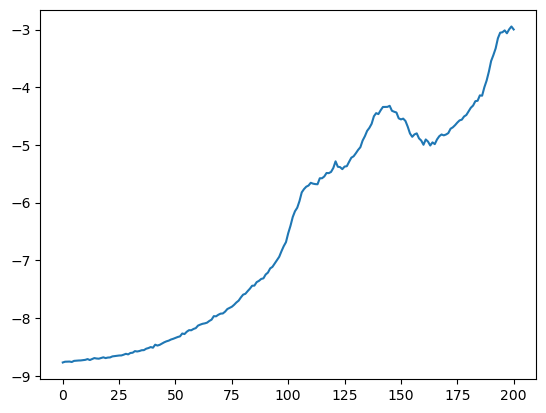

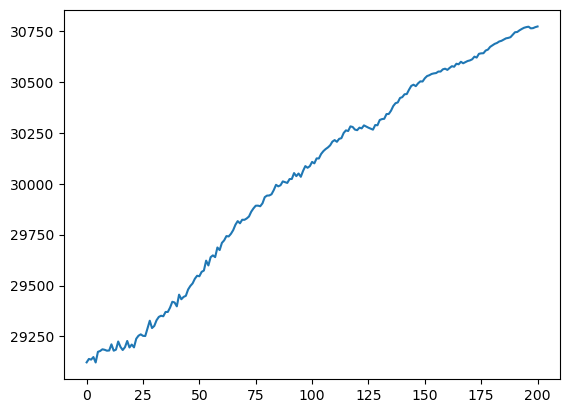

210
tensor([2.4367e-05, 1.5161e-05, 8.4224e-06, 1.0118e-05, 4.1901e-06, 6.6242e-06,
        9.1348e-06, 3.5805e-05, 3.0215e-06, 5.3788e-05, 1.7005e-04, 3.9345e-05,
        3.2718e-05, 1.4510e-04, 3.8226e-05, 2.7783e-05, 1.9754e-05, 2.8063e-04,
        1.2179e-04, 1.9742e-05, 9.3901e-04, 1.8876e-04, 3.8704e-04, 9.5194e-04,
        1.0417e-03, 2.0835e-03, 3.2506e-03, 2.7170e-02, 3.1809e-04, 7.8982e-04,
        1.4786e-03, 2.0867e-04, 1.1341e-02, 4.7923e-02, 1.3016e-04, 2.6699e-03,
        1.0131e-04, 3.8303e-02, 1.8414e-04, 1.8803e-04, 8.4699e-01, 1.7418e-04,
        5.4479e-04, 1.8554e-03, 9.3629e-04, 2.4195e-03, 1.4026e-05, 2.6089e-05,
        5.6089e-03, 7.1739e-04], grad_fn=<SoftmaxBackward0>)
tensor([1.9287e-04, 6.2189e-04, 2.2675e-03, 2.8654e-03, 5.6982e-05, 3.1350e-03,
        9.8432e-04, 7.3249e-03, 4.1709e-05, 3.8499e-04, 7.7412e-01, 3.4508e-04,
        1.2677e-04, 8.7177e-04, 9.7425e-04, 9.7958e-02, 3.0350e-04, 3.3474e-02,
        4.5993e-03, 3.8675e-05, 4.8759e-03, 7.1662e-04,

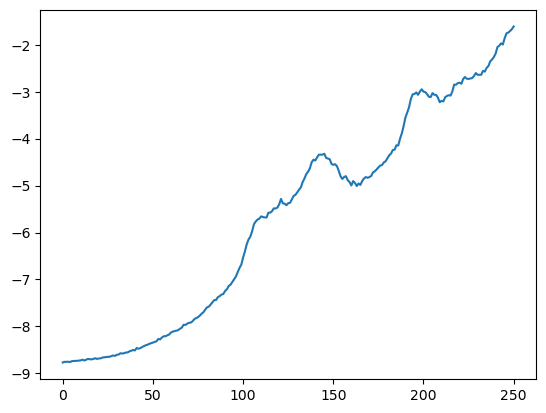

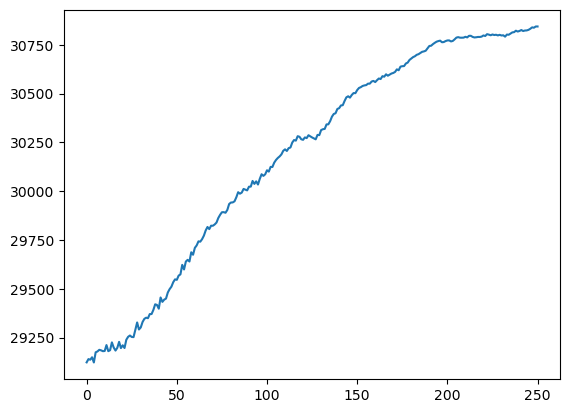

260
tensor([1.2220e-05, 3.1444e-06, 1.9158e-06, 1.7870e-06, 1.5942e-06, 4.1295e-06,
        5.1150e-06, 2.0203e-05, 1.1722e-06, 3.5808e-05, 1.0819e-04, 1.0322e-05,
        1.8509e-05, 5.7640e-05, 1.6967e-05, 1.5791e-05, 7.3298e-06, 8.7247e-05,
        5.4046e-05, 1.1123e-05, 2.7796e-04, 1.3634e-04, 1.9114e-04, 1.8832e-04,
        1.0239e-03, 7.5486e-04, 1.2397e-03, 1.7275e-02, 1.5308e-04, 1.6515e-04,
        1.6661e-03, 7.9481e-05, 6.2408e-03, 2.9608e-02, 5.2799e-05, 2.8763e-03,
        5.9078e-05, 1.4503e-02, 7.9294e-05, 6.0614e-05, 9.1536e-01, 9.8092e-05,
        4.5105e-04, 5.9332e-04, 4.5531e-04, 1.6713e-03, 4.6390e-06, 1.4051e-05,
        3.3876e-03, 8.6177e-04], grad_fn=<SoftmaxBackward0>)
tensor([2.8274e-05, 4.7411e-05, 1.1193e-04, 1.3769e-04, 5.6681e-06, 5.7647e-04,
        2.4734e-04, 1.7164e-03, 4.3742e-06, 5.2335e-05, 9.7331e-01, 2.8704e-05,
        1.4370e-05, 6.2968e-05, 1.1333e-04, 1.3408e-02, 2.3338e-05, 2.0317e-03,
        3.9214e-04, 4.6687e-06, 3.5429e-04, 9.3882e-05,

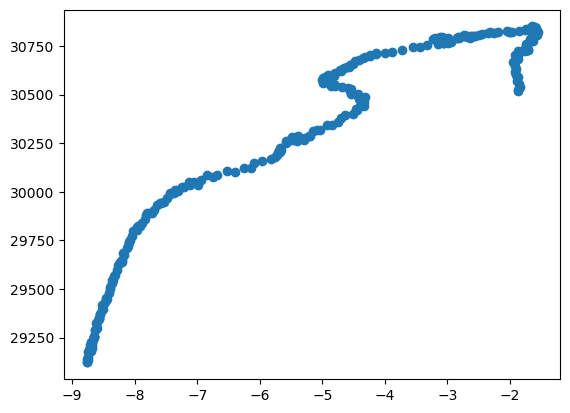

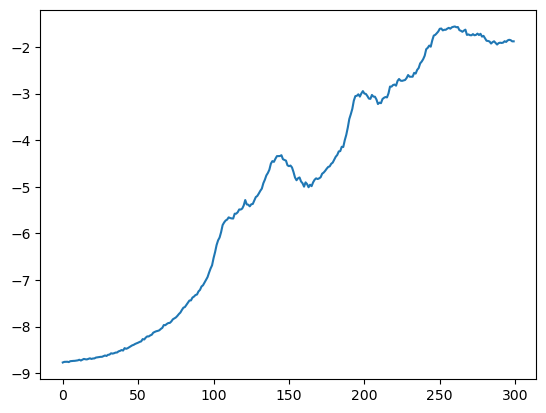

5208.629322052002


In [3]:
st = time.time()
neuralNet=NeuralNetwork(lr = 0.001, num_input= 2, num_actions=50, nn_dim = 150)
algorithm = ReinforceAlgorithm(game, neuralNet, numberBatches=300, numberEpiPerBatch=5000, discountFactor =1, creditFactor = 0.8, numberIterations = 1)
result = algorithm.solver()
et = time.time()
print(et - st)

Not yet converged


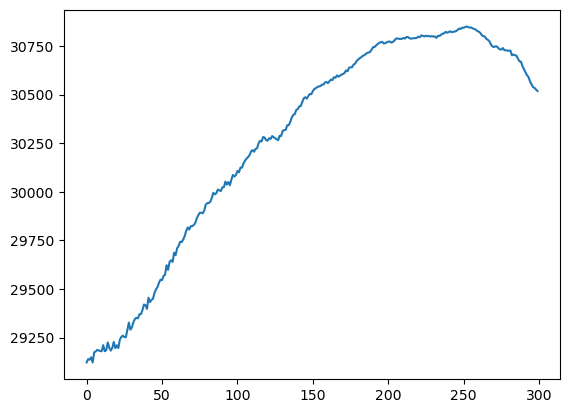

Best Payoff is  31136.4267578125
Best Actions are  [40 40 34 23  2]


In [14]:
if result[3] > 0.9:
    print(result[1], result[2], result[3])
else:
    print("Not yet converged")
plt.plot(result[0][0])
plt.show()
print("Best Payoff is ", result[5])
print("Best Actions are ", result[4])

In [5]:
# import pandas as pd
# profits = pd.DataFrame(game.profit).T
# prices = pd.DataFrame(game.prices).T
# demandPotential = pd.DataFrame(game.demandPotential).T
# learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

In [6]:
# learning.plot()

In [7]:
# learning.max()

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt

In [9]:
# learning = learning.to_numpy()

In [10]:
# learning_2 = [0]*len(learning)
# for i in range(len(learning_2)):
#     learning_2[i] = learning[i][0]

In [11]:
# plt.plot(learning_2)
# plt.show()

In [12]:
# avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

In [13]:
# plt.plot(avg_learning)
# plt.show()